<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/CSAI/TP/CSAI_tp03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Npop=10
Niter=100
Tmut=0.5
w=1
c1=2
c2=2

In [ ]:
import math
def f(x):
  return x* math.sin(10*math.pi*x)+1

print (f(0.3232305620526763))

0.784493209882607


In [ ]:
import random

def init_pop(N):
  pop = []
  for i in range(N):
    pop.append(random.uniform(0,1))
  return pop

pop = init_pop(10)
print(pop)
f_pop=[f(i) for i in pop]
print (f_pop)

[0.9385526368836857, 0.6846793016642606, 0.19822446002263305, 0.007000621739253865, 0.7508859277098677, 0.2621640504894007, 0.9021936153297533, 0.4667208940018538, 0.6519125301789901, 0.3706904042707613]
[0.12148913711022569, 1.3169683313138187, 0.9889487263030183, 1.001527271764312, 0.2494048842419908, 1.2432533465215216, 0.9378750172261454, 1.403794011020528, 1.6507361572683146, 0.7049012190683428]


In [ ]:
def selection(pop,n):
  f_pop=[(i,f(i)) for i in pop]
  f_pop.sort(key=lambda x:x[1],reverse=True)
  return f_pop[:n]

print(selection(pop,2))

[(0.6519125301789901, 1.6507361572683146), (0.4667208940018538, 1.403794011020528)]


In [ ]:
def clone(pop,n):
  C=[]
  f_pop=selection(pop,2)
  total=sum([i[1] for i in f_pop])
  prob=[(i[0],n*i[1]/total) for i in f_pop]
  for i in prob:
    for j in range(round(i[1])):
      C.append(i[0])
  return C


clones=clone(pop,5)
print(clones)

[0.6519125301789901, 0.6519125301789901, 0.6519125301789901, 0.4667208940018538, 0.4667208940018538]


In [ ]:
def mutation(clones,Tmut):
  f_clones=[(i,f(i)) for i in clones]
  sum_f=sum([i[1] for i in f_clones])
  prob=[(i[1]/sum_f) for i in f_clones]
  print("prob",prob)
  Tmuts=[(Tmut-(i*Tmut)) for i in prob]
  print("Tmuts",Tmuts)


  C = [(random.gauss(clones[i], prob[i]))for i in range(len(clones))]
  C = [max(0,min(1,i)) for i in C]
  return C


clones=clone(pop,5)
clones=mutation(clones,1)
print(clones)

prob [0.21272931043712948, 0.21272931043712948, 0.21272931043712948, 0.18090603434430577, 0.18090603434430577]
Tmuts [0.7872706895628705, 0.7872706895628705, 0.7872706895628705, 0.8190939656556943, 0.8190939656556943]
[1, 0.515172538491411, 0.5408223011785138, 0.7072896422257446, 0.3944350215874139]


In [ ]:
def replace(clones,pop):
  f_clones=[(i,f(i)) for i in clones]
  f_pop=[(i,f(i)) for i in pop]
  f_pop.sort(key=lambda x:x[1],reverse=True)
  f_pop=f_pop[:len(f_pop)-len(clones)]
  #print(f_pop)

  for i in f_clones:
    #print(f_pop[i][0])
    f_pop.append(i)
  #print(f_pop)
  pop=[i[0] for i in f_pop]
  return pop

print(pop)
pop=replace(clones,pop)
print(pop)

[0.9385526368836857, 0.6846793016642606, 0.19822446002263305, 0.007000621739253865, 0.7508859277098677, 0.2621640504894007, 0.9021936153297533, 0.4667208940018538, 0.6519125301789901, 0.3706904042707613]
[0.6519125301789901, 0.4667208940018538, 0.6846793016642606, 0.2621640504894007, 0.007000621739253865, 0.3520400742384919, 0.7854940711756434, 0.4123723855253354, 0.398351459167657, 0.0076063763242102955]


prob [0.2169694769237602, 0.2169694769237602, 0.2169694769237602, 0.17454578461435966, 0.17454578461435966]
Tmuts [0.3915152615381199, 0.3915152615381199, 0.3915152615381199, 0.41272710769282017, 0.41272710769282017]
prob [0.2169694769237602, 0.2169694769237602, 0.2169694769237602, 0.17454578461435966, 0.17454578461435966]
Tmuts [0.3915152615381199, 0.3915152615381199, 0.3915152615381199, 0.41272710769282017, 0.41272710769282017]
prob [0.20976787908159494, 0.20976787908159494, 0.20976787908159494, 0.18534818137760758, 0.18534818137760758]
Tmuts [0.39511606045920256, 0.39511606045920256, 0.39511606045920256, 0.4073259093111962, 0.4073259093111962]
prob [0.2042590704764757, 0.2042590704764757, 0.2042590704764757, 0.19361139428528643, 0.19361139428528643]
Tmuts [0.39787046476176213, 0.39787046476176213, 0.39787046476176213, 0.4031943028573568, 0.4031943028573568]
prob [0.20282720450746344, 0.20282720450746344, 0.20282720450746344, 0.1957591932388049, 0.1957591932388049]
Tmuts [0.398586397

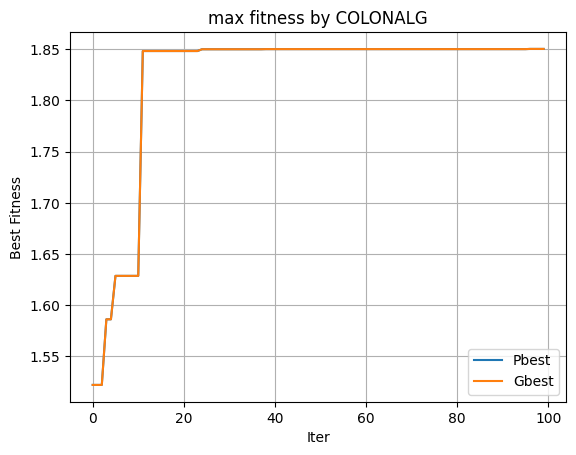

In [ ]:
import matplotlib.pyplot as plt
def CLONALG(Npop,Niter,Tmut):
  pop = init_pop(10)
  Pbest_f = []
  best_f = []
  gbest = f(pop[0])
  for i in range(Niter):
    clones=clone(pop,5)
    clones=mutation(clones,Tmut)
    pop=replace(clones,pop)

    f_pop=[(i,f(i)) for i in pop]
    f_pop.sort(key=lambda x:x[1],reverse=True)
    Pbest_f.append(f_pop[0][1])
    if f_pop[0][1] > gbest:
      gbest = f_pop[0][1]
    best_f.append(gbest)


  print(f_pop[0])

  ## Plot the best fitness evolution
  plt.plot(range(Niter), Pbest_f, label="Pbest")
  plt.plot(range(Niter), best_f, label="Gbest")
  plt.xlabel("Iter")
  plt.ylabel("Best Fitness")
  plt.title("max fitness by COLONALG")
  plt.legend()
  plt.grid(True)
  plt.show()
  return best_f


best_f=CLONALG(10,100,0.5)



# **PSO**

In [ ]:
def init_particle():
  x=random.uniform(0,1)
  vX=random.uniform(-1,1)
  return {'x':x,'vX':vX}
particle=init_particle()
print(particle)

{'x': 0.36518706005302526, 'vX': 0.49587742504913646}


In [ ]:
def init_popPso(n):
  popPso=[]
  for i in range(n):
    popPso.append(init_particle())
  return popPso

popPso=init_popPso(3)
print(popPso)

[{'x': 0.6051592561469811, 'vX': 0.8580594265287995}, {'x': 0.8336912017555329, 'vX': 0.8894681474011432}, {'x': 0.3432457183540931, 'vX': 0.7664840065154255}]


In [ ]:
def g(x):
  return x* math.sin(10*math.pi*x)+1

print(particle['x'],g(particle['x']))

0.36518706005302526 0.6755958607464015


In [ ]:
def init_Pbest(popPso):
  Pbest=[]
  for p in popPso:
    Pbest.append({'x': p['x'],'fitness': g(p['x'])})

  return Pbest

print(init_Pbest(popPso))

[{'x': 0.6051592561469811, 'fitness': 1.0976570112444815}, {'x': 0.8336912017555329, 'fitness': 1.7266385295940487}, {'x': 0.3432457183540931, 'fitness': 0.6644527277472736}]


Final Gbest: {'x': 0.8509370981889665, 'fitness': 1.8505683702570526}


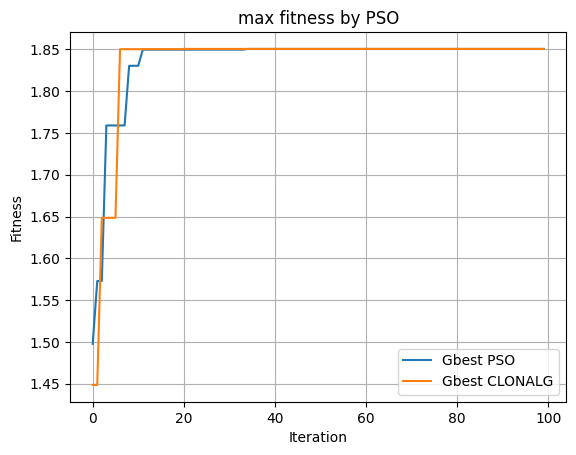

In [ ]:
import random
import matplotlib.pyplot as plt
def PSO(Npop,Niter):
  Diag = []
  popPso=init_popPso(Npop)
  Pbest=init_Pbest(popPso)
  Gbest = max(Pbest, key=lambda p: p['fitness'])
  for i in range(Niter):
    for j in range(Npop):

      gx = g(popPso[j]['x'])
      if gx > Pbest[j]['fitness']:
          Pbest[j] = {'x': popPso[j]['x'],'fitness': gx}

      if gx > Gbest['fitness']:
          Gbest = {'x': popPso[j]['x'],'fitness': gx}

    #print(Gbest)
    Diag.append(Gbest['fitness'])

    for j in range(Npop):
        v=(w*popPso[j]['vX']+
          c1*random.uniform(0,1)*(Pbest[j]['x']-popPso[j]['x'])+
          c2*random.uniform(0,1)*(Gbest['x']-popPso[j]['x']))
        popPso[j][f'vX']=v
        popPso[j]['x']+=v
        popPso[j]['x'] = max(0, min(1, popPso[j]['x']))



  print("Final Gbest:", Gbest)
  return Diag


Diag=PSO(Npop,Niter)

plt.plot(range(Niter), Diag, label="Gbest PSO")
plt.plot(range(Niter), best_f, label="Gbest CLONALG")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.title("max fitness by PSO")
plt.legend()
plt.grid()
plt.show()
